<a href="https://colab.research.google.com/github/yjliu212/Lithology-Classification-Using-Deep-Neural-Network/blob/main/Assignment_3_Lithology_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks
#!ls  # To list files and verify the location


/content/drive/My Drive/Colab Notebooks


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

        vp_log    pr_log  density_log        ip_log  classification
0  2810.890416  0.255540     2.183194   6136.719031               1
1  4827.500072  0.362570     2.172885  10489.603264               0
2  4061.978796  0.461884     2.634378  10700.788416               0
3  3595.304695  0.419667     2.174682   7818.645626               0
4  2046.065242  0.441968     2.190365   4481.629301               0


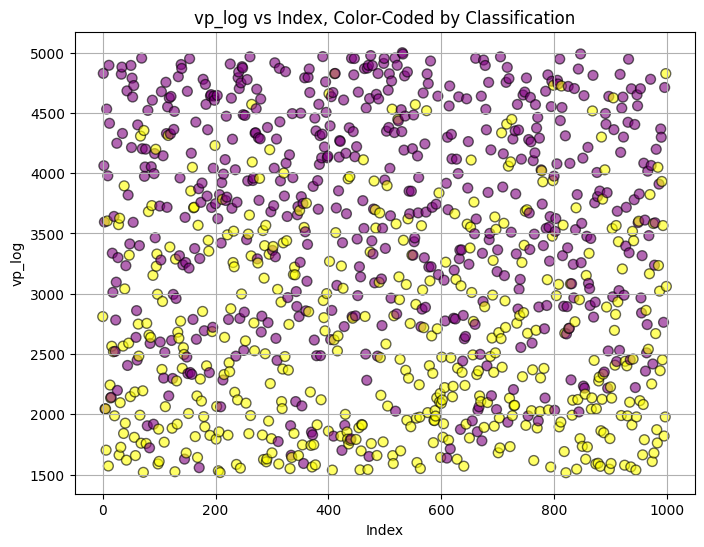

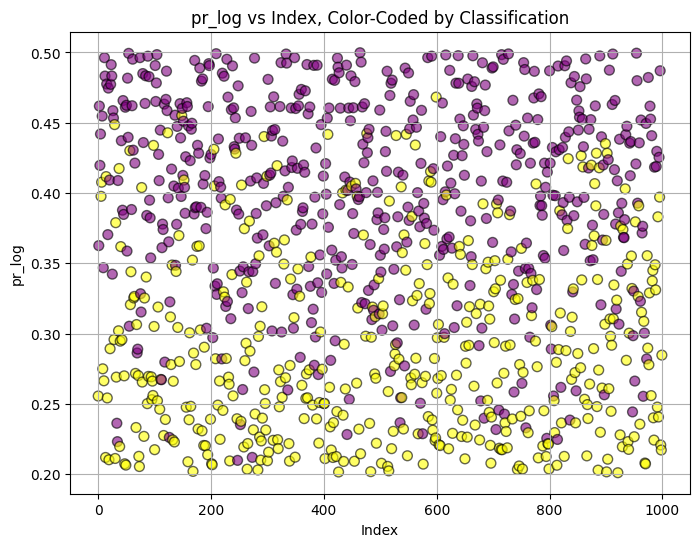

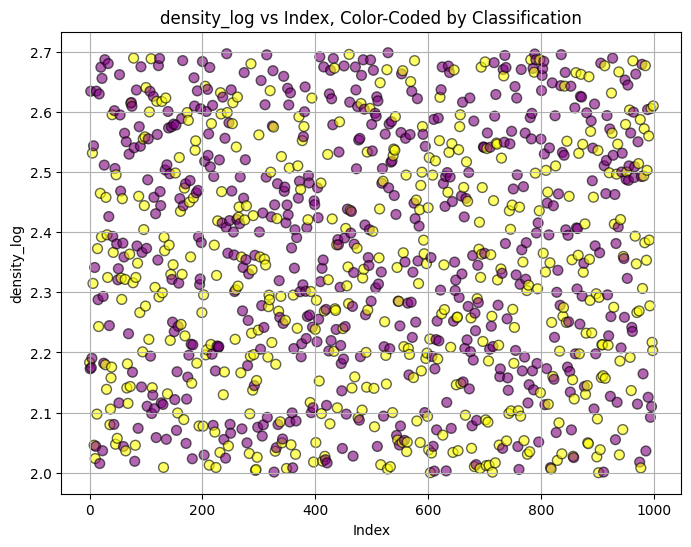

(1000, 3)
(1000, 1)
        vp_log    pr_log  density_log
0  2810.890416  0.255540     2.183194
1  4827.500072  0.362570     2.172885
2  4061.978796  0.461884     2.634378
3  3595.304695  0.419667     2.174682
4  2046.065242  0.441968     2.190365
   classification
0               1
1               0
2               0
3               0
4               0


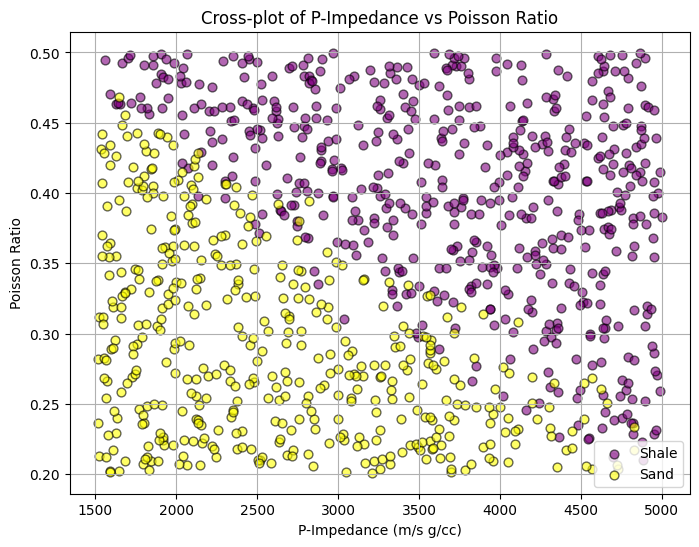

In [ ]:
# Load each CSV file into pandas DataFrames
df = pd.read_csv('lithology_class_data.csv')

# Display the first few rows of each DataFrame to verify
print(df.head())

# Plot each feature vs. index in separate figures, color-coded by classification
features = ['vp_log', 'pr_log', 'density_log']
colors = {0: 'purple', 1: 'yellow'}

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[feature], c=df['classification'].map(colors), alpha=0.6, edgecolor='k', s=50)
    plt.xlabel("Index")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Index, Color-Coded by Classification")
    plt.grid(True)
    plt.show()# Plot each feature vs. index in separate figures, color-coded by classification

# Separate features and target
X = df[['vp_log', 'pr_log', 'density_log']]
y = df[['classification']]

print(X.shape)
print(y.shape)

print(X.head())
print(y.head())

ip_log=df['vp_log']
pr_log=df['pr_log']
classification=df['classification']

# Plot and QC
plt.figure(figsize=(8, 6))
plt.scatter(ip_log[classification == 0], pr_log[classification == 0], color='purple', label='Shale', alpha=0.6, edgecolor='k', s=40)
plt.scatter(ip_log[classification == 1], pr_log[classification == 1], color='yellow', label='Sand', alpha=0.6, edgecolor='k', s=40)
#plt.plot(ip2,pr2,'g')
#plt.plot(ip_sand,pr_sand,'b')
plt.legend()
plt.xlabel("P-Impedance (m/s g/cc)")
plt.ylabel("Poisson Ratio")
plt.title("Cross-plot of P-Impedance vs Poisson Ratio")
plt.grid(True)
plt.show()

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [ ]:
# Build a model with a sigmoid output
model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))  # 3 input features
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_std, y_train, epochs=10, batch_size=10)

# Predict probabilities for the test set
predicted_probability = model.predict(X_test_std)

# Convert probabilities to class labels
y_pred = (predicted_probability > 0.5).astype(int)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6357 - loss: 0.6530
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.5284
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9223 - loss: 0.3930
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9639 - loss: 0.2584
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9746 - loss: 0.1875
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9742 - loss: 0.1527
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9738 - loss: 0.1205
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9690 - loss: 0.1144
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9819 - loss: 0.0952
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9724 - loss: 0.0929
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


(200,)
(200,)
(200, 3)
(200,)
(200,)


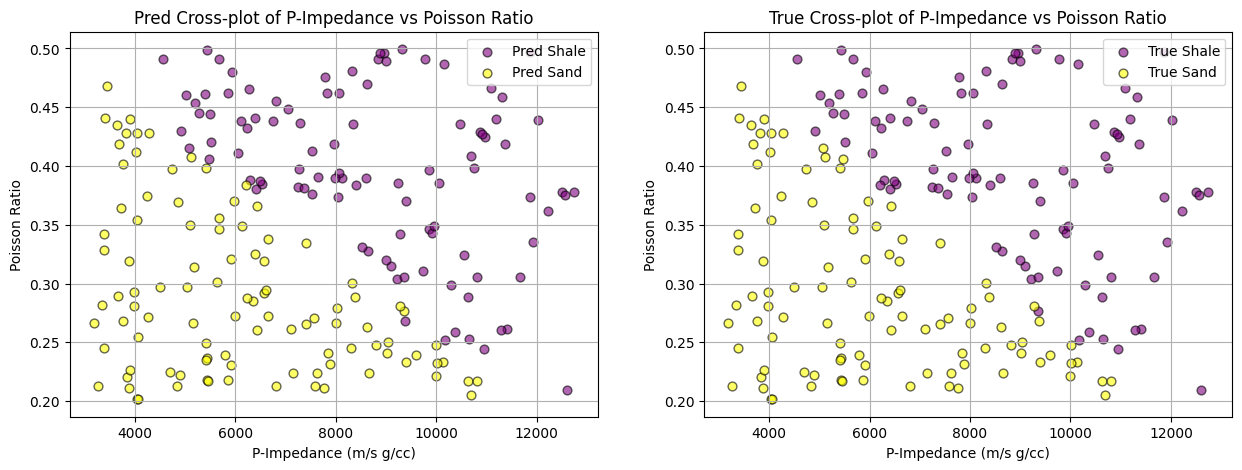

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
# Assuming y_pred is a 1D array and y_test is a DataFrame
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['predicted_class'])

class_test = y_test.values.reshape(-1)
class_pred = y_pred.values.reshape(-1)

print(class_test.shape)
print(class_pred.shape)

print(X_test.shape)

ip_test=X_test.values[:,0]*X_test.values[:,2]
pr_test=X_test.values[:,1]

print(ip_test.shape)
print(pr_test.shape)

# Plot and QC
plt.figure(figsize=(15, 5))
plt.subplot(1,2,2)
plt.scatter(ip_test[class_test == 0], pr_test[class_test == 0], color='purple', label='True Shale', alpha=0.6, edgecolor='k', s=40)
plt.scatter(ip_test[class_test == 1], pr_test[class_test == 1], color='yellow', label='True Sand', alpha=0.6, edgecolor='k', s=40)
#plt.plot(ip2,pr2,'g')
#plt.plot(ip_sand,pr_sand,'b')
plt.legend()
plt.xlabel("P-Impedance (m/s g/cc)")
plt.ylabel("Poisson Ratio")
plt.title("True Cross-plot of P-Impedance vs Poisson Ratio")
plt.grid(True)

plt.subplot(1,2,1)
plt.scatter(ip_test[class_pred == 0], pr_test[class_pred == 0], color='purple', label='Pred Shale', alpha=0.6, edgecolor='k', s=40)
plt.scatter(ip_test[class_pred == 1], pr_test[class_pred == 1], color='yellow', label='Pred Sand', alpha=0.6, edgecolor='k', s=40)
#plt.plot(ip2,pr2,'g')
#plt.plot(ip_sand,pr_sand,'b')
plt.legend()
plt.xlabel("P-Impedance (m/s g/cc)")
plt.ylabel("Poisson Ratio")
plt.title("Pred Cross-plot of P-Impedance vs Poisson Ratio")
plt.grid(True)


     predicted_Probability
521               0.006833
737               0.222586
740               0.007765
660               0.433224
411               0.655717


Text(0.5, 1.0, 'Cross-plot of P-Impedance vs Poisson Ratio, Color-Coded by Predicted Confidence')

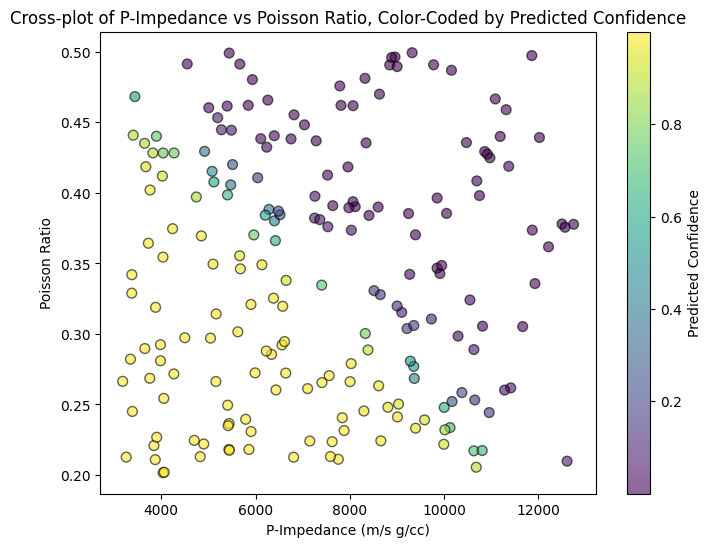

In [ ]:
prob_pred = pd.DataFrame(predicted_probability, index=y_test.index, columns=['predicted_Probability'])

print(prob_pred.head())

plt.figure(figsize=(8, 6))
plt.scatter(ip_test, pr_test, c=prob_pred['predicted_Probability'], cmap='viridis', alpha=0.6, edgecolor='k', s=50)
plt.colorbar(label='Predicted Confidence')
plt.xlabel("P-Impedance (m/s g/cc)")
plt.ylabel("Poisson Ratio")
plt.title("Cross-plot of P-Impedance vs Poisson Ratio, Color-Coded by Predicted Confidence")